# Pandas Groupby


## Introduction

In this lab, you'll learn how to use the `.groupby()` method in Pandas to summarize datasets.

## Objectives
You will be able to: 

- Use groupby methods to aggregate different groups in a dataframe


## Using `.groupby()` 

Let's bring in the Titantic data set.

In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df = df.drop(columns=['Name','Ticket','Embarked', 'Cabin'])
df = df.dropna()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,0.0,3,male,22.0,1.0,0.0,7.2500
1,2.0,1.0,1,female,38.0,1.0,0.0,71.2833
2,3.0,1.0,3,female,26.0,0.0,0.0,7.9250
3,4.0,1.0,1,female,35.0,1.0,0.0,53.1000
4,5.0,0.0,3,male,35.0,0.0,0.0,8.0500


During the Exploratory Data Analysis phase, one of the most common tasks you'll want to do is split the dataset into subgroups and compare them to see if you can notice any trends.  For instance, you may want to group the passengers together by gender or age. You can do this by using the `.groupby()` method built-in to pandas DataFrames. 

To group passengers by gender, you would type:

In [2]:
df.groupby('Sex')

In [3]:
# This line of code is equivalent to the one above
df.groupby(df['Sex'])

Note that this alone will not display a result -- although you have split the dataset into groups, you don't have a meaningful way to display information until you chain an **_Aggregation Function_** onto the groupby.  This allows you to compute summary statistics.

You can quickly use an aggregation function by chaining the call to the end of the `.groupby()` method.

In [4]:
df.groupby('Sex').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,267590.0,284.0,131323132333?33322331222?2333231233333?2321333...,12812.85,838.0,765.0,19208.2047
male,384203.0,191.0,331333322111211?3313331333223332?3133331331121...,23133.01,997.0,775.0,21465.1410


You can use aggregation functions to quickly help us compare subsets of our data.  For example, the aggregate statistics displayed above allow you to quickly notice that there were more female survivors overall than male survivors.

## Aggregation functions


There are many built-in aggregate methods provided for you in the `pandas` package, and you can even write and apply your own. Some of the most common aggregate methods you may want to use are:

* `.min()`: returns the minimum value for each column by group  
* `.max()`: returns the maximum value for each column by group  
* `.mean()`: returns the average value for each column by group  
* `.median()`: returns the median value for each column by group  
* `.count()`: returns the count of each column by group


You can also see a list of all of the built-in aggregation methods by creating a grouped object and then using tab completion to inspect the available methods:

In [8]:
grouped_df = df.groupby('Sex')
# For the following line of code, remove the `#` and then hit the tab after the period.
# grouped_df.<TAB>

female         Axes(0.1,0.15;0.363636x0.75)
male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

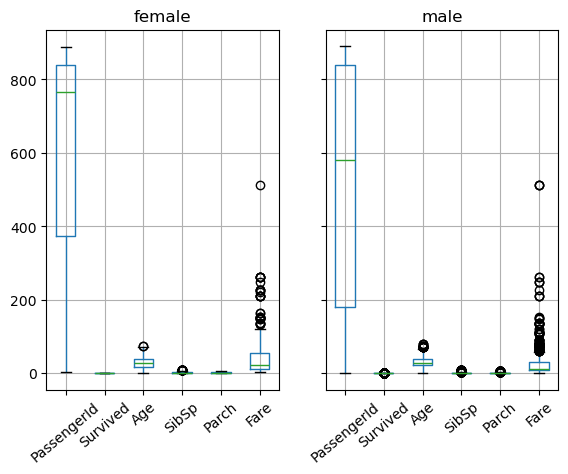

In [10]:
grouped_df.boxplot(rot=40)

This will display the following output:

```In [26]: grouped_df.<TAB>
gb.agg        gb.boxplot    gb.cummin     gb.describe   gb.filter     gb.get_group  gb.height     gb.last       gb.median     gb.ngroups    gb.plot       gb.rank       gb.std        gb.transform
gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      gb.groups     gb.hist       gb.max        gb.min        gb.nth        gb.prod       gb.resample   gb.sum        gb.var
gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       gb.quantile   gb.size       gb.tail       gb.weight```
```

This is a comprehensive list of all built-in methods available to grouped objects. Note that some are aggregation methods, while others, such as `gb.fillna()`, allow us to fill missing values to individual groups independently.  

## Multiple groups

You can also split data into multiple different levels of groups by passing in an array containing the name of every column you want to group by -- for instance, by every combination of both `Sex` and `Pclass`.   

In [11]:
df.groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch       Fare
Sex    Pclass                                                                 
female 1        594.965812  0.811966  34.098291  1.521368  1.538462  84.552209
       2        602.647059  0.722689  26.338992  1.605042  1.596639  26.989777
       3        550.912162  0.466216  25.677973  1.858108  1.810811  21.144596
       ?        758.118644  0.576271  32.011356  3.288136  2.152542  50.413771
male   1        601.886792  0.415094  38.287799  1.440252  1.490566  56.046671
       2        587.170068  0.258503  31.630340  1.414966  1.122449  29.693905
       3        377.919060  0.151436  25.757624  0.973890  0.506527  15.446343
       ?        746.051948  0.376623  32.862597  2.428571  2.324675  29.516452

IndexingError: Too many indexers

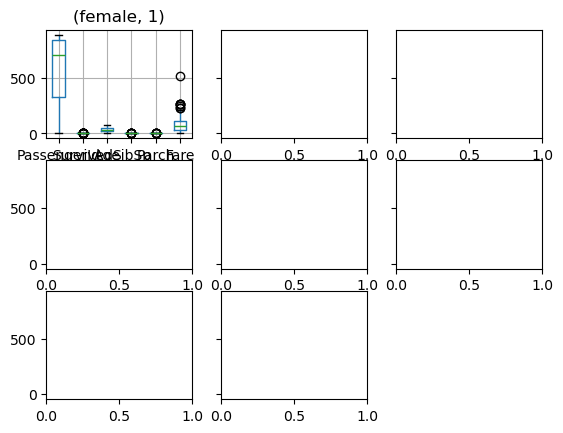

In [13]:
new_group = df.groupby(['Sex', 'Pclass'])
new_group.boxplot()

## Selecting information from grouped objects

Since the resulting object returned is a DataFrame, you can also slice a selection of columns you're interested in from the DataFrame returned. 

The example below demonstrates the syntax for returning the mean of the `Survived` class for every combination of `Sex` and `Pclass`:

In [14]:
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.811966
        2         0.722689
        3         0.466216
        ?         0.576271
male    1         0.415094
        2         0.258503
        3         0.151436
        ?         0.376623
Name: Survived, dtype: float64

The above example slices by column, but you can also slice by index. Take a look:

In [15]:
grouped = df.groupby(['Sex', 'Pclass'])['Survived'].mean()
print(grouped['female'])

Pclass
1    0.811966
2    0.722689
3    0.466216
?    0.576271
Name: Survived, dtype: float64


In [18]:
print(grouped['female'][1])

0.7226890756302521


/var/folders/pn/v9tvzf9s5ms7zcp53821ct0m0000gn/T/ipykernel_4712/3206576291.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(grouped['female'][1])


Note that you need to provide only the value `female` as the index, and are returned all the groups where the passenger is female, regardless of the `Pclass` value. The second example shows the results for female passengers with a 1st-class ticket.

## Summary

In this lab, you learned about how to split a DataFrame into subgroups using the `.groupby()` method. You also learned to generate aggregate views of these groups by applying built-in methods to a groupby object.